In [17]:
import os
import cv2
import numpy as np
from copy import deepcopy

from keras.utils import plot_model
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

# custom package imports
from Helpers_Localization import helper_model
from Helpers_Localization import helper_data
from Helpers_Localization import helper_stats
from Helpers_Localization import helper_losses

In [1]:
import glob
import pandas as pd
import seaborn as sns

## For renaming files

In [2]:
import os
folder = r"C:\Users\vase_\Downloads\jetbot-nano\Data\snapshots"
for count, filename in enumerate(os.listdir(folder)):
    dst = f"{str(count)}.jpg"
    src =f"{folder}/{filename}"  # foldername/filename, if .py file is outside folder
    dst =f"{folder}/{dst}"
        
    # rename() function will
    # rename all the files
    os.rename(src, dst)

In [2]:
path = r'C:\Users\vase_\Downloads\jetbot-nano\Data\csv'
csv_files = glob.glob(path + "/*.csv")

In [3]:
df_list = (pd.read_csv(file) for file in csv_files)

# Concatenate all DataFrames
big_df   = pd.concat(df_list, ignore_index=True)

In [4]:
df = big_df.loc[big_df['class'] == 'bot']

In [5]:
df['hight'] = df['ymax']-df['ymin']
df['width'] = df['xmax']-df['xmin']

In [6]:
def custom_round(x, base=5):
    return int(base * round(float(x)/base))

df['hight'] = df['hight'].apply(lambda x: custom_round(x, base=5))
df['width'] = df['width'].apply(lambda x: custom_round(x, base=5))

In [7]:
pd.crosstab(df.width,df.hight)

hight,20,25,30,35,40,45,50,55,60,65,...,115,120,125,130,135,145,150,155,165,170
width,,,,,,,,,,,,,,,,,,,,,
20,0,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,3,8,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,0,1,5,3,4,2,2,2,0,0,...,0,0,0,0,0,0,0,0,0,0
35,1,5,3,3,3,12,10,5,1,0,...,0,0,0,0,0,0,0,0,0,0
40,0,1,4,3,14,23,15,11,4,0,...,0,0,0,0,0,0,0,0,0,0
45,0,0,5,13,12,13,9,12,6,3,...,0,0,0,0,0,0,0,0,0,0
50,0,0,1,6,9,13,12,14,6,7,...,0,0,0,0,0,0,0,0,0,0
55,0,1,0,2,4,7,14,9,2,3,...,0,0,0,0,0,0,0,0,0,0
60,0,0,0,2,1,6,5,4,11,10,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df_solution = df.pivot_table(index=['width','hight'], aggfunc='size')

In [59]:
df_solution.columns()

AttributeError: 'Series' object has no attribute 'columns'

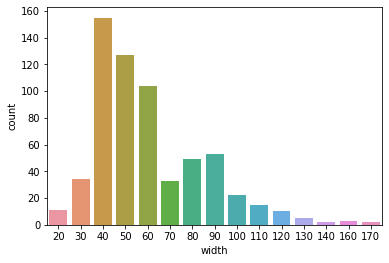

In [47]:
sns.countplot(x='width', data=df)

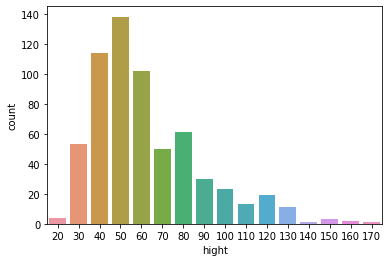

In [45]:
sns.countplot(x='hight', data=df)

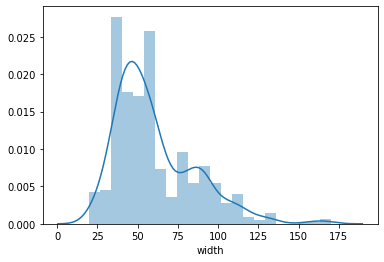

In [34]:
sns.distplot(df['width'])

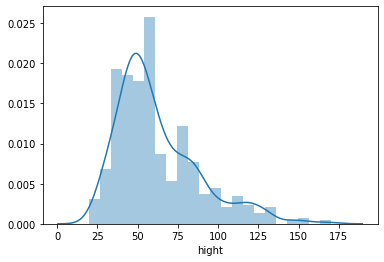

In [33]:
sns.distplot(df['hight'])

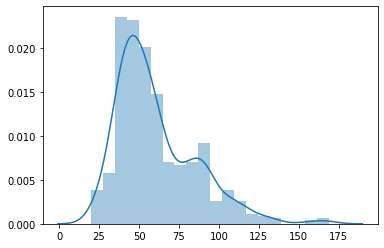

In [7]:
sns.distplot(df['xmax']-df['xmin'])

In [118]:
# --- paths ---
version = 'v142'

# NOTE: specify destination paths
srcImagesPath = r'C:\Users\vase_\Downloads\jetbot-nano\Data\snapshots'

srcAnnotationsPath = r'C:\Users\vase_\Downloads\jetbot-nano\Data\csv'
dstModelsPath = r'C:\Users\vase_\Downloads\jetbot-nano\Machine Vision\model'

# create folders to save data from the current execution
if not os.path.exists(os.path.join(dstModelsPath, version)):
    os.mkdir(os.path.join(dstModelsPath, version))
else:
    # to avoid overwriting training results
    print(f"Folder name {version} exists.")
    exit(1)

modelsPath = os.path.join(dstModelsPath, version)


# --- variables ---
class_names = ('dash', 'whole')   # the element index marks the integer coding of classes (bgr - 0, cars - 1)

imgDims = {'rows': 300, 'cols': 400}    # input image dimensions
num_classes = 1
img_depth = 1
img_dims = (imgDims['rows'], imgDims['cols'], img_depth)


Folder name v142 exists.


In [121]:
x_train_orig, bboxes_train = helper_data.read_data_rpn(os.path.join(srcImagesPath, 'train'), (imgDims['cols'], imgDims['rows']), img_depth, srcAnnotationsPath, exclude_empty=True, shuffle=False)
x_val_orig, bboxes_val = helper_data.read_data_rpn(os.path.join(srcImagesPath, 'val'), (imgDims['cols'], imgDims['rows']), img_depth, srcAnnotationsPath, exclude_empty=True, shuffle=False)

100%|██████████| 39/39 [00:00<00:00, 195.47it/s]


In [122]:
# --- prepare ground truth data in required CNN output format ---
anchor_dims = ((40,40), (60,60))   # anqors (height, width)
anchor_stride = 8      # NOTE: depends on the model configuration

# iou thresholds for positive and negative samples
iou_low = 0.3
iou_high = 0.8
num_negs_ratio = 10     # select X times more negative than positive samples

In [123]:
y_class_train, valid_train = helper_data.get_anchor_data_cls(bboxes_train, anchor_dims, img_dims, anchor_stride, iou_low, iou_high, num_negs_ratio)
y_class_val, valid_val = helper_data.get_anchor_data_cls(bboxes_val, anchor_dims, img_dims, anchor_stride, iou_low, iou_high, num_negs_ratio)

586it [00:20, 29.13it/s]
39it [00:01, 23.29it/s]


In [124]:
x_train = []
for valid_ind in valid_train:
    x_train.append(x_train_orig[valid_ind])
x_train = np.array(x_train)
x_val = []
for valid_ind in valid_val:
    x_val.append(x_val_orig[valid_ind])
x_val = np.array(x_val)

In [70]:
print(f'Number of positive samples in training set: {np.sum(y_class_train[:, :, :, -1])}')
print(f'Number of positive samples in validation set: {np.sum(y_class_val[:, :, :, -1])}')

Number of positive samples in training set: 1100
Number of positive samples in validation set: 20


In [16]:
epochs = 30
lr = 0.0001
batch_size = 15      # number of samples to process before updating the weights

model = helper_model.construct_model_ssd_cls(input_shape=img_dims, num_anchors=len(anchor_dims))   # build model architecture

# compile model
model.compile(loss={
                  'rpn_out_class': helper_losses.rpn_loss_cls_multilabel,     # loss function to be applied to the output layer named rpn_out_class
                   },
              optimizer=Adam(lr=lr),
              metrics=['accuracy'])


# --- fit model ---
model_checkpoint = ModelCheckpoint(filepath=os.path.join(modelsPath, 'checkpoint-{epoch:03d}-{val_accuracy:.4f}.hdf5'),   # epoch number and val accuracy will be part of the weight file name
                                   monitor='val_accuracy',      # metric to monitor when selecting weight checkpoints to save
                                   verbose=1,
                                   save_best_only=False)     # True saves only the weights after epochs where the monitored value (val accuracy) is improved


Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [150]:
datagen = ImageDataGenerator(brightness_range=[0.3,1,],data_format='channels_last',interpolation_order=1)
it_train = datagen.flow(x_train,y_class_train)
steps = int(x_train.shape[0] / 64)

In [151]:
it_train.next()

(array([[[[ 63.],
          [ 65.],
          [ 65.],
          ...,
          [ 73.],
          [ 71.],
          [ 72.]],
 
         [[ 66.],
          [ 66.],
          [ 66.],
          ...,
          [ 72.],
          [ 72.],
          [ 72.]],
 
         [[ 66.],
          [ 65.],
          [ 66.],
          ...,
          [ 72.],
          [ 72.],
          [ 72.]],
 
         ...,
 
         [[ 65.],
          [ 64.],
          [ 65.],
          ...,
          [ 61.],
          [ 61.],
          [ 58.]],
 
         [[ 64.],
          [ 64.],
          [ 65.],
          ...,
          [ 61.],
          [ 60.],
          [ 58.]],
 
         [[ 64.],
          [ 64.],
          [ 65.],
          ...,
          [ 61.],
          [ 60.],
          [ 58.]]],
 
 
        [[[ 31.],
          [ 33.],
          [ 34.],
          ...,
          [ 55.],
          [ 51.],
          [ 50.]],
 
         [[ 32.],
          [ 33.],
          [ 34.],
          ...,
          [ 52.],
          [ 

In [152]:
cv2.imshow("image", it_train[0][0][0].astype('uint8'))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [28]:
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True,rotation_range=20)
it_train = datagen.flow(x_train,y_class_train)
steps = int(x_train.shape[0] / 64)
history6=model.fit(it_train,epochs=200,steps_per_epoch=steps,validation_data=(x_val,y_class_val))


Epoch 1/200
1/1 [==============================] - 3s 3s/step - loss: 172.1565 - accuracy: 5.1892e-04 - val_loss: 144.3583 - val_accuracy: 0.0016
Epoch 2/200
1/1 [==============================] - 1s 1s/step - loss: 140.2981 - accuracy: 5.7432e-04 - val_loss: 119.4629 - val_accuracy: 0.0016
Epoch 3/200
1/1 [==============================] - 1s 1s/step - loss: 116.3387 - accuracy: 5.9122e-04 - val_loss: 93.6124 - val_accuracy: 0.0022
Epoch 4/200
1/1 [==============================] - 1s 787ms/step - loss: 90.6404 - accuracy: 7.5676e-04 - val_loss: 68.1246 - val_accuracy: 0.0027
Epoch 5/200
1/1 [==============================] - 1s 1s/step - loss: 64.4863 - accuracy: 0.0011 - val_loss: 44.8680 - val_accuracy: 0.0032
Epoch 6/200
1/1 [==============================] - 1s 1s/step - loss: 40.3726 - accuracy: 0.0024 - val_loss: 22.4680 - val_accuracy: 0.0054
Epoch 7/200
1/1 [==============================] - 1s 1s/step - loss: 18.2059 - accuracy: 0.0027 - val_loss: 23.8496 - val_accuracy: 0.

KeyboardInterrupt: 

In [20]:
history = model.fit(x_train, y_class_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    callbacks=[model_checkpoint],
                    verbose=1,
                    validation_data=(x_val, y_class_val),
                    shuffle=True)



Train on 510 samples, validate on 25 samples
Epoch 1/30
510/510 [==============================] - 91s 179ms/step - loss: 4.1389 - accuracy: 0.0048 - val_loss: 0.4160 - val_accuracy: 0.0279

Epoch 00001: saving model to C:\Users\vase_\Downloads\jetbot-nano\Machine Vision\model\v3\checkpoint-001-0.0279.hdf5
Epoch 2/30
510/510 [==============================] - 100s 195ms/step - loss: 0.2098 - accuracy: 0.0429 - val_loss: 0.1781 - val_accuracy: 0.0366

Epoch 00002: saving model to C:\Users\vase_\Downloads\jetbot-nano\Machine Vision\model\v3\checkpoint-002-0.0366.hdf5
Epoch 3/30
510/510 [==============================] - 95s 187ms/step - loss: 0.1445 - accuracy: 0.0486 - val_loss: 0.1319 - val_accuracy: 0.0400

Epoch 00003: saving model to C:\Users\vase_\Downloads\jetbot-nano\Machine Vision\model\v3\checkpoint-003-0.0400.hdf5
Epoch 4/30
510/510 [==============================] - 92s 180ms/step - loss: 0.1164 - accuracy: 0.0504 - val_loss: 0.1168 - val_accuracy: 0.0408

Epoch 00004: savin

In [21]:
# --- save model ---
# save model architecture
print(model.summary())      # parameter info for each layer
with open(os.path.join(modelsPath, 'modelSummary.txt'), 'w') as fh:     # save model summary
    model.summary(print_fn=lambda x: fh.write(x + '\n'))
plot_model(model, to_file=os.path.join(modelsPath, 'modelDiagram.png'), show_shapes=True)   # save diagram of model architecture

# save model configuration and weights
model_json = model.to_json()  # serialize model architecture to JSON
with open(os.path.join(os.path.join(modelsPath, 'model.json')), "w") as json_file:
    json_file.write(model_json)
model.save_weights(os.path.join(modelsPath, 'model.h5'))  # serialize weights to HDF5
print("Saved model to disk.")


# --- save training curves and logs ---
helper_stats.save_training_logs(history=history, dst_path=modelsPath)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 300, 400, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 300, 400, 32)      320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 300, 400, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 150, 200, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 150, 200, 32)      9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 150, 200, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 75, 100, 32)       0   

In [63]:
im_path = r'C:\Users\vase_\Downloads\mobile-robotics\data'
index = 0
im_name = str(index) + '.jpg'
x_test = cv2.imread(os.path.join(im_path, im_name),0)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
#images_list = np.array([x_test,x_test]).astype(np.uint8)
x_test = np.expand_dims(x_test, axis=0)
output_cls = model.predict(x_val, verbose=1)
helper_data.save_results_cls_square(im_path, x_test, plot_color, output_cls, anchor_dims, anchor_stride, prob_thr)

8/8 [==============================] - 0s 4ms/step


1it [00:00, 100.55it/s]


In [25]:
resultsPath =r'C:\Users\vase_\Downloads\jetbot-nano\Machine Vision\result'
prob_thr = 0.93  # probability threshold
plot_color = (0, 255, 0)    # color of resulting bounding boxes

In [26]:
output_cls = model.predict(x_val, verbose=1)
helper_data.save_results_cls_square(os.path.join(resultsPath, 'test'), x_val, plot_color, output_cls, anchor_dims, anchor_stride, prob_thr)

25/25 [==============================] - 0s 16ms/step


25it [00:00, 675.61it/s]


In [17]:
helper_data.save_results_cls_square(os.path.join(resultsPath, 'true'), x_val, plot_color, y_class_val, anchor_dims, anchor_stride, prob_thr)

25it [00:00, 326.61it/s]


In [6]:
imgVis = deepcopy(x_val_orig[0])
for bb in bboxes_val[0]:
    cv2.rectangle(imgVis, (bb[1], bb[0]), (bb[3], bb[2]), color=(255))  # visualize all annotated objects

In [7]:
cv2.imshow("image", imgVis)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [53]:
imgVis = deepcopy(x_train_orig[0])
cv2.rectangle(imgVis, (29, 121), (48, 166), color=(255))
cv2.imshow("image", imgVis)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
im_path = r'C:\Users\vase_\Downloads\mobile-robotics\snapshots\train\0.jpg'
index = 0
im_name = str(index) + '.jpg'
imgVis = cv2.imread(im_path,0)
cv2.rectangle(imgVis, (29, 121), (48, 166), color=(255))
cv2.imshow("image", imgVis)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
imgVis.shape

(224, 224)

In [16]:
if (224,224) != (imgVis.shape[1], imgVis.shape[0]):   
        print("ok")

